In [1]:
import pandas as pd
from DE_rpy2 import DE_rpy2

d:\anaconda\envs\biopython\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
count_matrix = pd.read_csv('./data/count_matrix.csv', sep='\t')
count_matrix

,id,sample1,sample2,sample3,sample4,sample5,sample6
0,gene1,111.03,166.68,191.78,185.80,239.27,185.86
1,gene2,3.28,3.79,2.13,4.77,4.10,2.71
2,gene3,384.40,408.26,410.81,368.04,521.75,377.87
3,gene4,16.92,20.46,17.11,25.64,29.69,22.01
4,gene5,12.05,26.94,17.86,34.50,31.34,28.52
...,...,...,...,...,...,...,...
2995,gene2996,42.13,45.05,47.69,36.35,45.43,35.04
2996,gene2997,8.21,6.97,7.02,8.77,7.92,7.29
2997,gene2998,75.26,94.87,131.75,70.54,80.34,70.73
2998,gene2999,488.58,399.97,583.63,763.57,835.54,776.85


In [3]:
design_matrix = pd.DataFrame({'condition':['treated'] * 3 + ['untreated'] * 3})
design_matrix.index = count_matrix.drop('id',axis = 1).columns
design_matrix

,condition
sample1,treated
sample2,treated
sample3,treated
sample4,untreated
sample5,untreated
sample6,untreated


In [4]:
DE = DE_rpy2(count_matrix=count_matrix, design_matrix=design_matrix)

In [5]:
DE.deseq2()

D:\Blogs\Differential Expression Analysis\Github\DE_rpy2.py:145: UserWarning: There exist NAN in the adjusted p-value
see https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#why-are-some-p-values-set-to-na

  warnings.warn('There exist NAN in the adjusted p-value\n'


,id,label
0,gene1,0
1,gene2,0
2,gene3,0
3,gene4,0
4,gene5,0
...,...,...
2995,gene2996,0
2996,gene2997,0
2997,gene2998,1
2998,gene2999,0


In [6]:
DE.edger()

,id,label
0,gene1,0
1,gene2,0
2,gene3,0
3,gene4,0
4,gene5,0
...,...,...
2995,gene2996,1
2996,gene2997,0
2997,gene2998,1
2998,gene2999,1


In [7]:
DE.limma()

,id,label
0,gene1,0
1,gene2,0
2,gene3,0
3,gene4,0
4,gene5,0
...,...,...
2995,gene2996,1
2996,gene2997,0
2997,gene2998,1
2998,gene2999,0


In [8]:
DE.get_final_label(method='inner')

,id,label
0,gene1,0
1,gene2,0
2,gene3,0
3,gene4,0
4,gene5,0
...,...,...
2995,gene2996,0
2996,gene2997,0
2997,gene2998,1
2998,gene2999,0


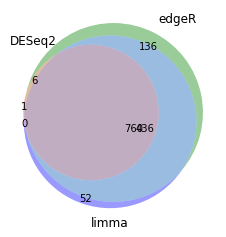

{'000': 1609,
 '001': 52,
 '010': 136,
 '011': 436,
 '100': 1,
 '101': 0,
 '110': 6,
 '111': 760}

In [9]:
DE.plot_label_difference()